In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df_compare = pd.read_csv('df_compare.csv')
df_final_group = pd.read_csv('df_final_group.csv')

In [3]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          244768 non-null  int64  
 1   LocationNormalized  244768 non-null  object 
 2   Category            244768 non-null  object 
 3   SalaryNormalized    244768 non-null  int64  
 4   total_male_words    244768 non-null  int64  
 5   total_female_words  244768 non-null  int64  
 6   ratio               244768 non-null  float64
 7   label               244768 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.9+ MB


In [5]:
df_compare.head()

,Unnamed: 0,LocationNormalized,Category,SalaryNormalized,total_male_words,total_female_words,ratio,label
0,0,Dorking,Engineering Jobs,25000,4,0,10.0,male
1,1,Glasgow,Engineering Jobs,30000,6,1,6.0,male
2,2,Hampshire,Engineering Jobs,30000,13,1,13.0,male
3,3,Surrey,Engineering Jobs,27500,3,0,10.0,male
4,4,Surrey,Engineering Jobs,25000,2,0,10.0,male


In [4]:
df_final_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271292 entries, 0 to 271291
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   LocationNormalized  271292 non-null  object
 1   Category            271292 non-null  object
 2   words               271292 non-null  object
 3   gender              271292 non-null  object
 4   count_type          271292 non-null  object
 5   count               271292 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 12.4+ MB


In [6]:
df_final_group.head()

,LocationNormalized,Category,words,gender,count_type,count
0,Abbey Village,Trade & Construction Jobs,lead,male,total,1
1,Abbey Village,Trade & Construction Jobs,lead,male,unique,1
2,Abbey Wood,Engineering Jobs,lead,male,total,1
3,Abbey Wood,Engineering Jobs,lead,male,unique,1
4,Abbots Langley,Charity & Voluntary Jobs,active,male,total,1


## df_compare

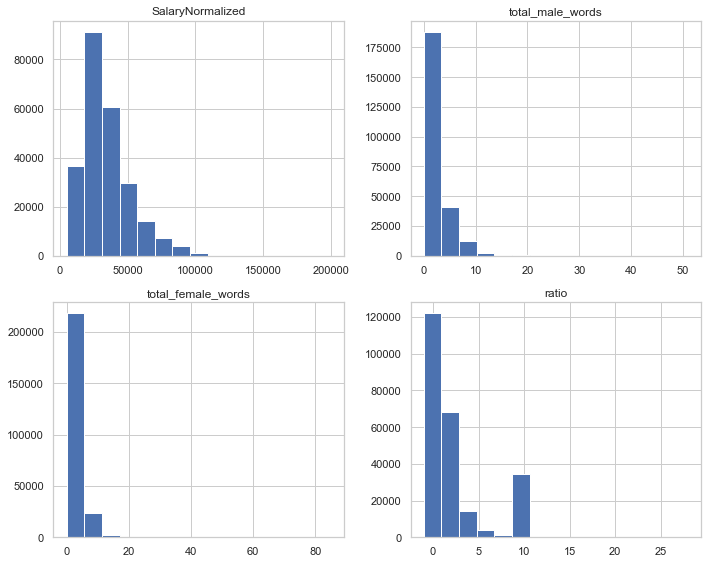

In [8]:
# Histograms for numeric variables
df_compare[['SalaryNormalized', 'total_male_words', 'total_female_words', 'ratio']].hist(bins=15, figsize=(10, 8), layout=(2, 2))
plt.tight_layout()
plt.show()


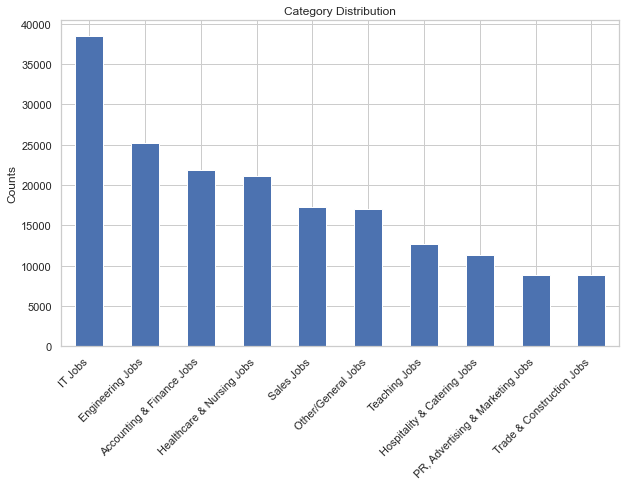

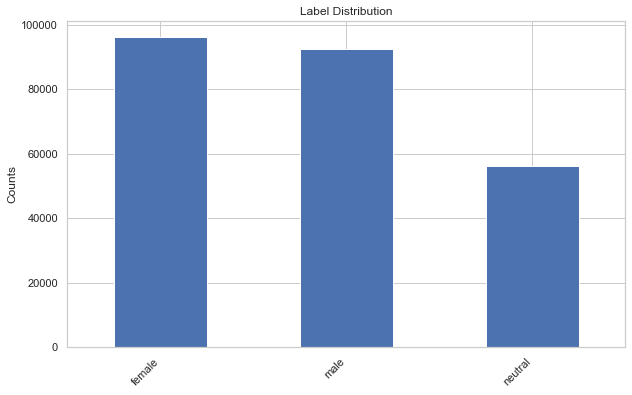

In [9]:
# Function to plot bar charts for categorical variables
def plot_category_counts(df, column, title, limit=None):
    if limit:
        data = df[column].value_counts().nlargest(limit)
    else:
        data = df[column].value_counts()
    data.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_category_counts(df_compare, 'Category', 'Category Distribution', limit=10)  # Adjust limit as necessary
plot_category_counts(df_compare, 'label', 'Label Distribution')

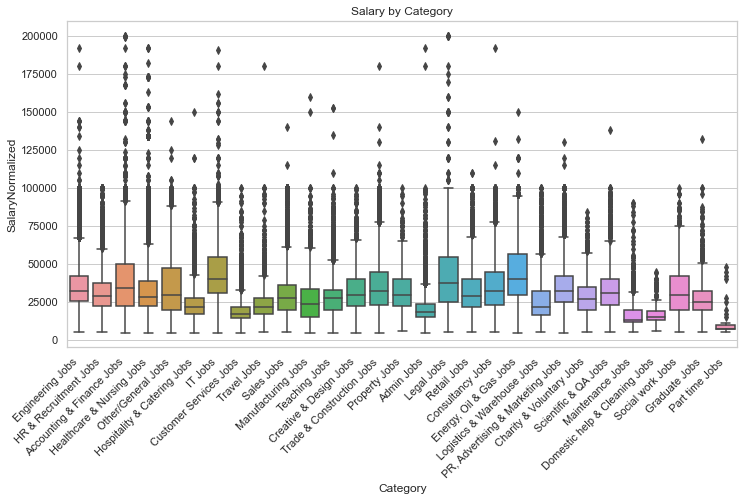

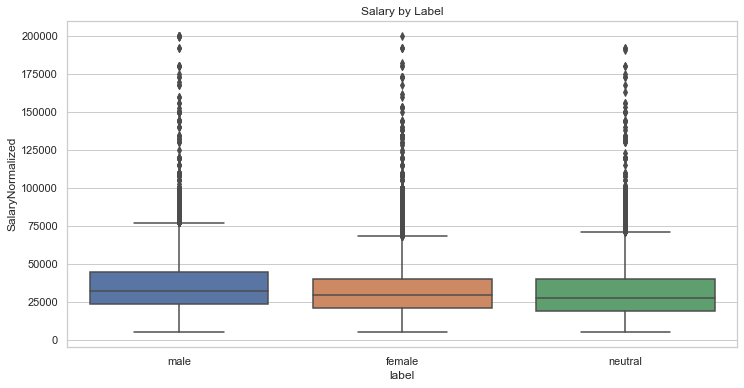

In [10]:
# Box plots to observe spread and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='SalaryNormalized', data=df_compare)
plt.xticks(rotation=45, ha='right')
plt.title('Salary by Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='SalaryNormalized', data=df_compare)
plt.title('Salary by Label')
plt.show()


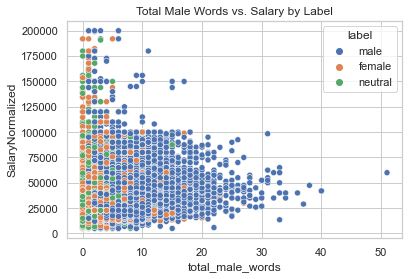

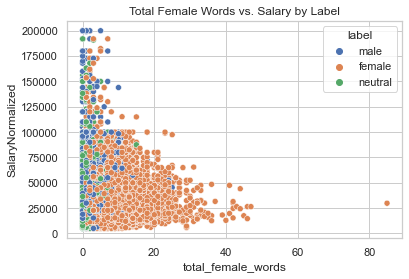

In [11]:
# Scatter plots to explore relationships
sns.scatterplot(x='total_male_words', y='SalaryNormalized', hue='label', data=df_compare)
plt.title('Total Male Words vs. Salary by Label')
plt.show()

sns.scatterplot(x='total_female_words', y='SalaryNormalized', hue='label', data=df_compare)
plt.title('Total Female Words vs. Salary by Label')
plt.show()


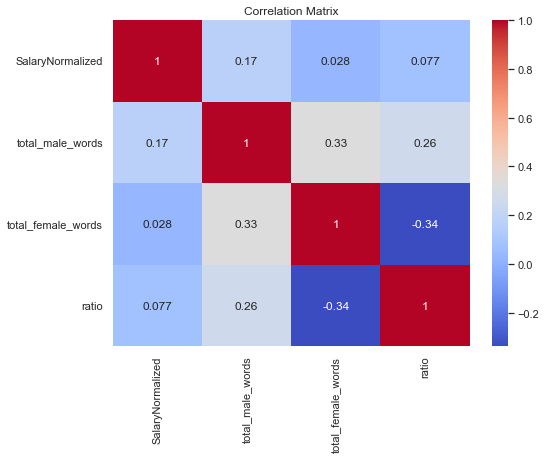

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_compare[['SalaryNormalized', 'total_male_words', 'total_female_words', 'ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


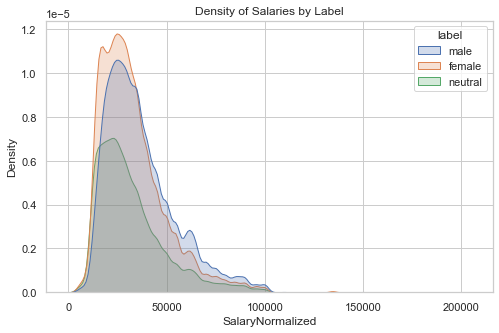

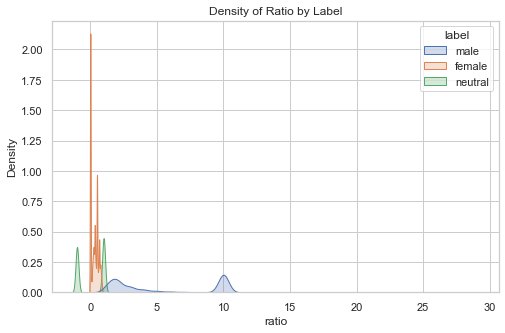

In [17]:
# Density Plot for SalaryNormalized by Label
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_compare, x='SalaryNormalized', hue='label', fill=True)
plt.title('Density of Salaries by Label')
plt.show()

# Density Plot for Ratio by Label
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_compare, x='ratio', hue='label', fill=True)
plt.title('Density of Ratio by Label')
plt.show()


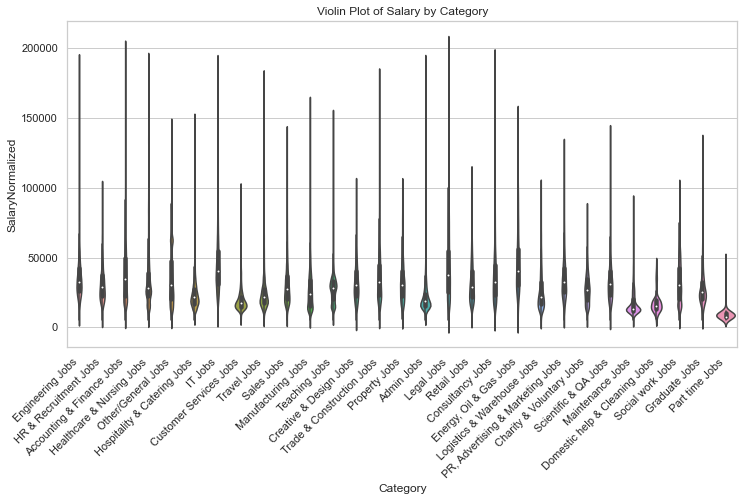

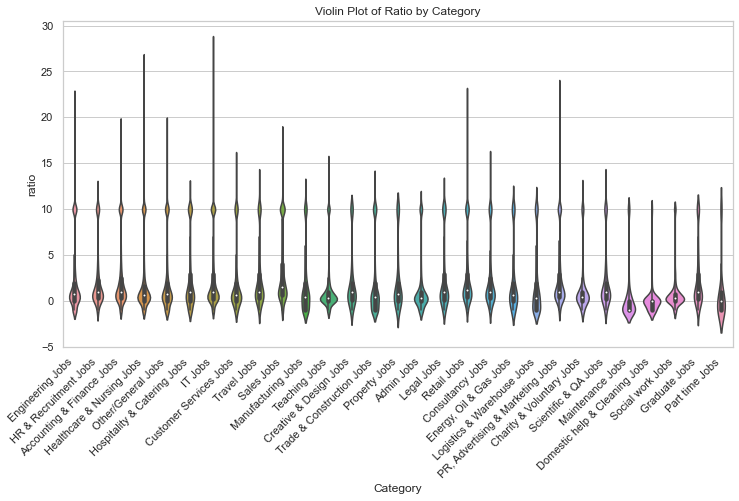

In [18]:
# Violin plot for SalaryNormalized by Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='SalaryNormalized', data=df_compare)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Salary by Category')
plt.show()

# Violin plot for Ratio by Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='ratio', data=df_compare)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Ratio by Category')
plt.show()


### df_final_group

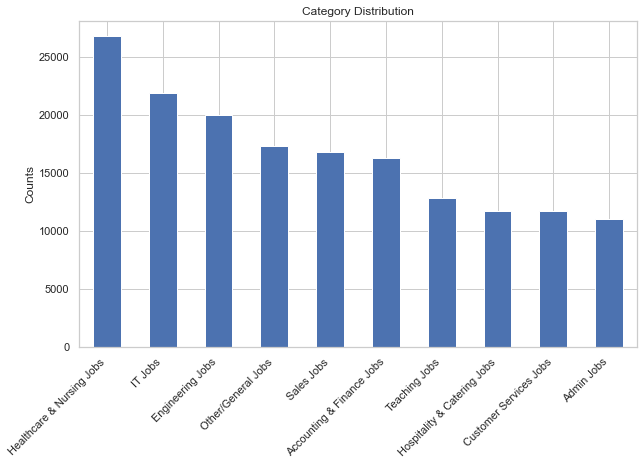

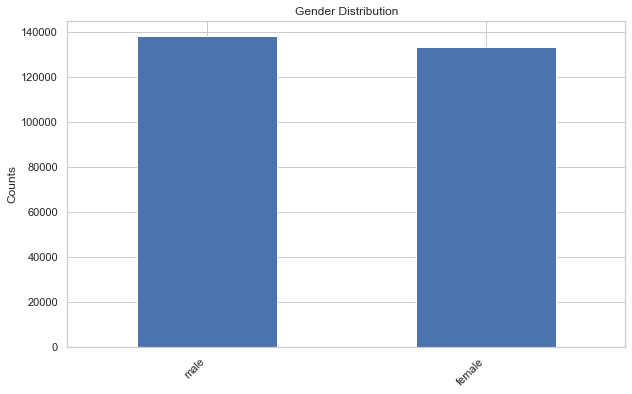

In [13]:
plot_category_counts(df_final_group, 'Category', 'Category Distribution', limit=10)  # Adjust limit as necessary
plot_category_counts(df_final_group, 'gender', 'Gender Distribution')


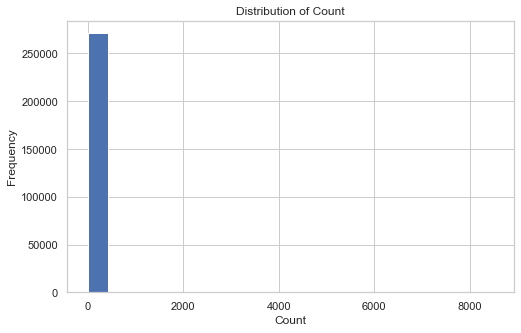

In [14]:
# Histogram for count
df_final_group['count'].hist(bins=20, figsize=(8, 5))
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


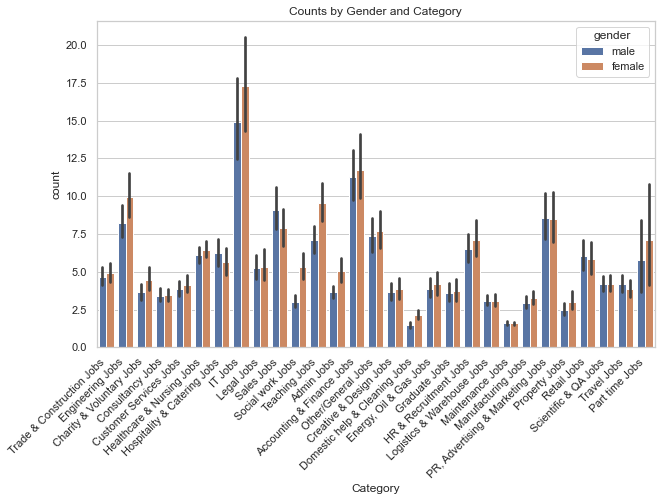

In [15]:
# Grouped bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='count', hue='gender', data=df_final_group)
plt.xticks(rotation=45, ha='right')
plt.title('Counts by Gender and Category')
plt.show()


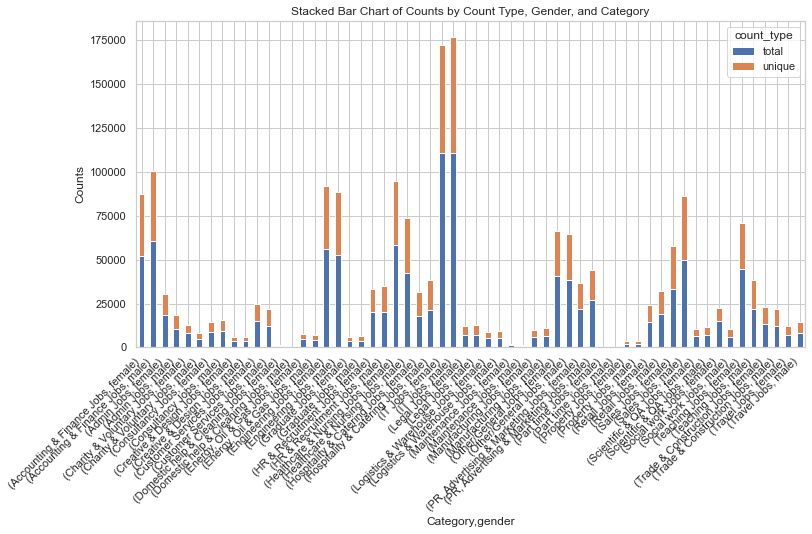

In [16]:
# Stacked bar charts for count types
grouped = df_final_group.groupby(['Category', 'gender', 'count_type'])['count'].sum().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Counts by Count Type, Gender, and Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Counts')
plt.show()


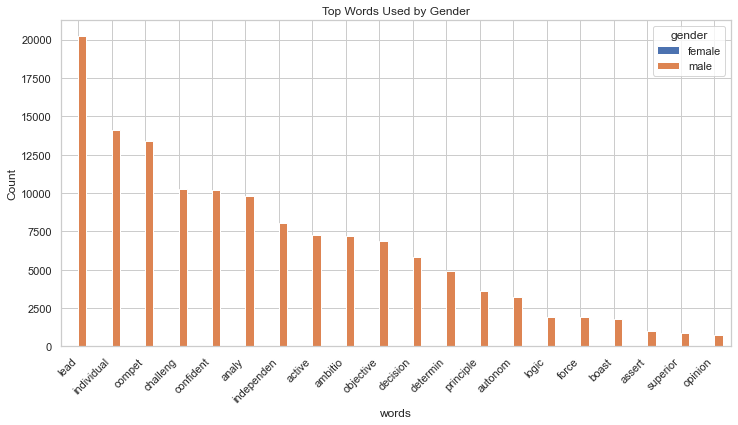

In [19]:
# Top words used by gender
top_words = df_final_group.groupby(['words', 'gender']).size().unstack().fillna(0)
top_words = top_words.sort_values(by='male', ascending=False).head(20)  # Top 20 words used by males

top_words.plot(kind='bar', figsize=(12, 6))
plt.title('Top Words Used by Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


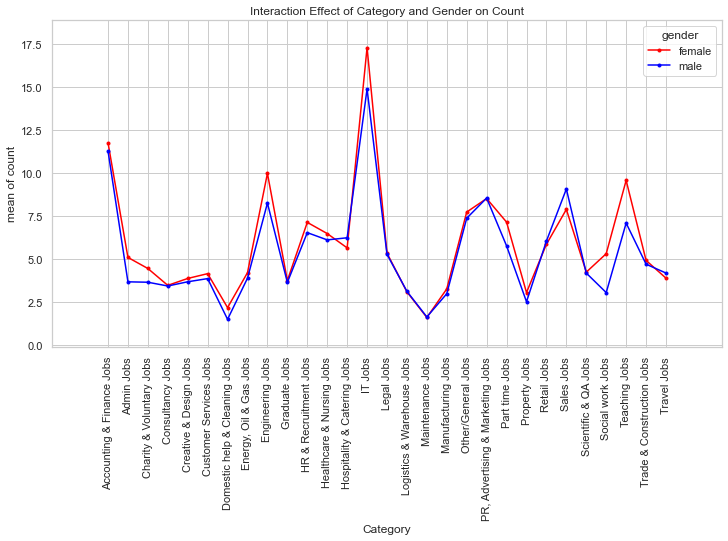

In [20]:
# Interaction plot for Category and Gender impacting counts
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.interaction_plot(df_final_group['Category'], df_final_group['gender'], df_final_group['count'], ax=ax, colors=['red', 'blue'])
plt.xticks(rotation=90)
plt.title('Interaction Effect of Category and Gender on Count')
plt.show()


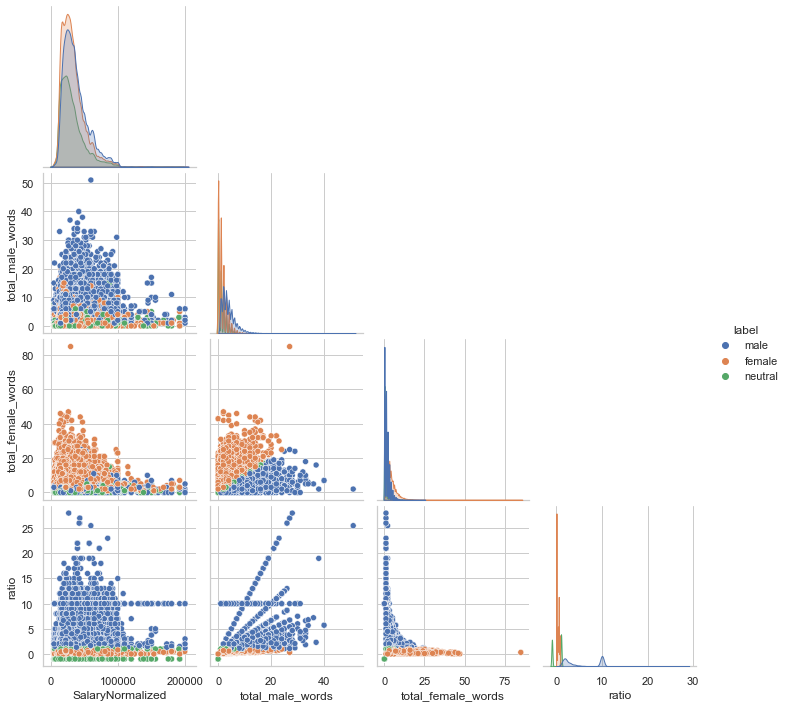

In [21]:
# Pair Plot for df_compare focusing on numerical variables
sns.pairplot(df_compare[['SalaryNormalized', 'total_male_words', 'total_female_words', 'ratio', 'label']], hue='label', corner=True)
plt.show()


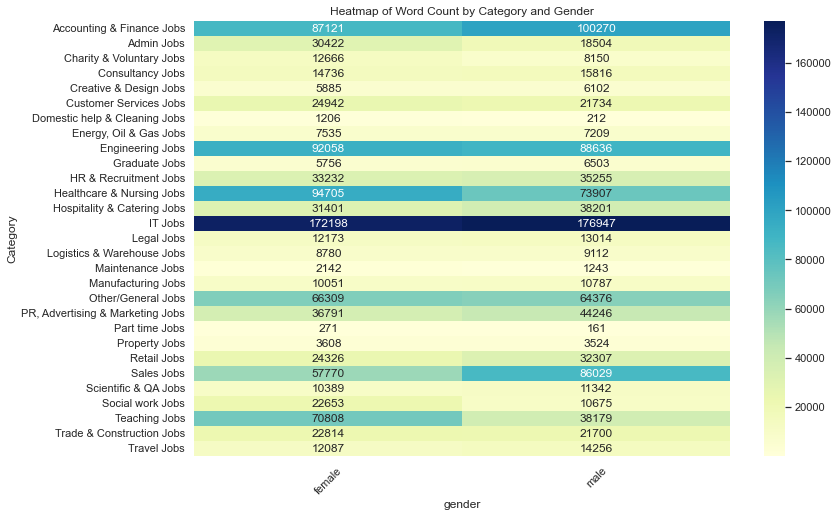

In [28]:
# Pivot table for heatmap
word_usage = df_final_group.pivot_table(index='Category', columns='gender', values='count', aggfunc='sum', fill_value=0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(word_usage, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap of Word Count by Category and Gender')
plt.xticks(rotation=45)
plt.show()


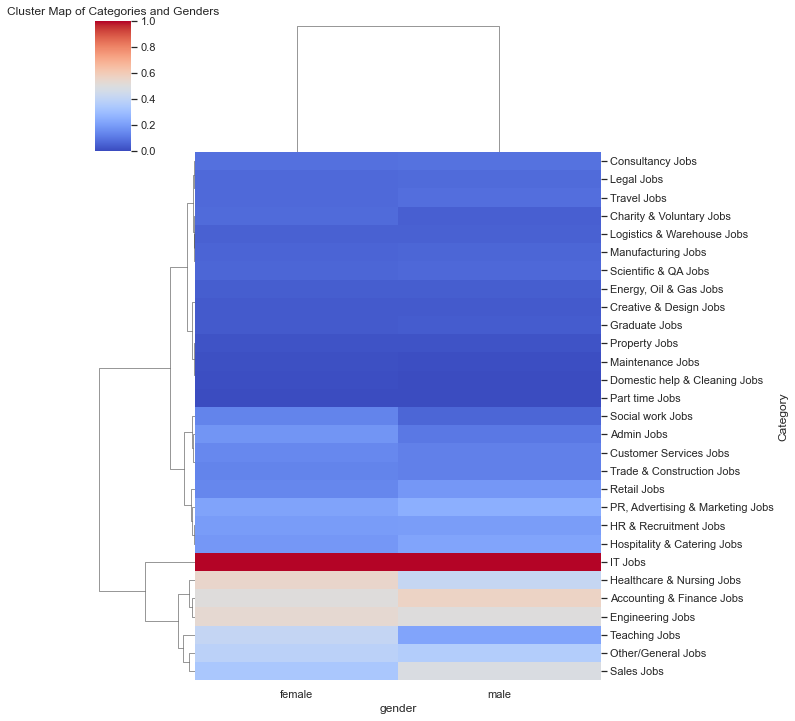

In [29]:
# Clustermap to see clustering of categories and genders based on word counts
sns.clustermap(word_usage, standard_scale=1, method='ward', cmap='coolwarm')
plt.title('Cluster Map of Categories and Genders')
plt.show()


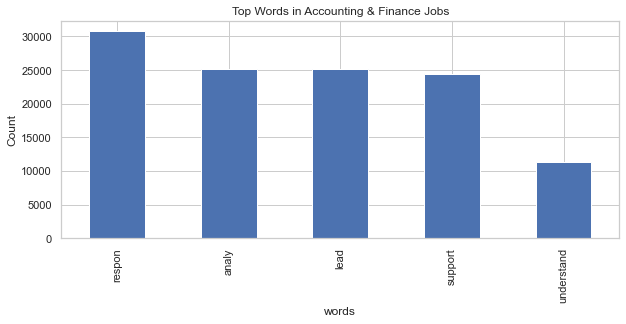

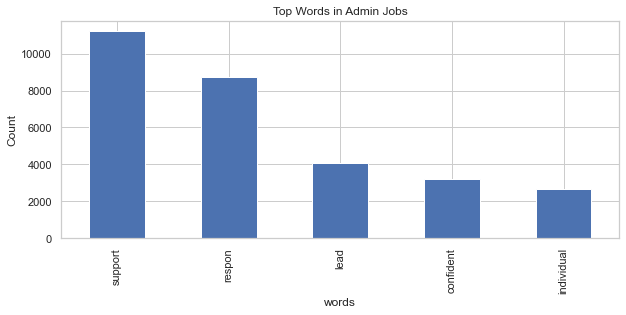

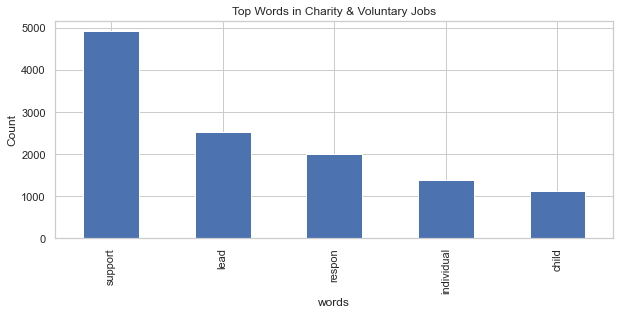

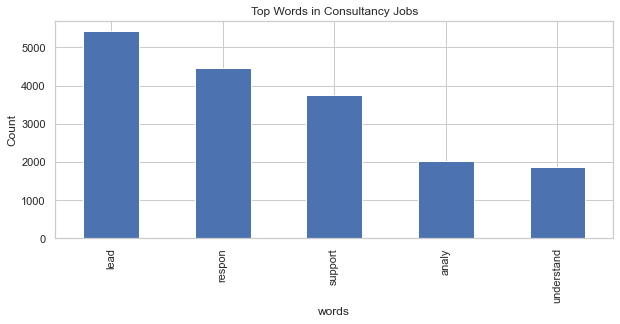

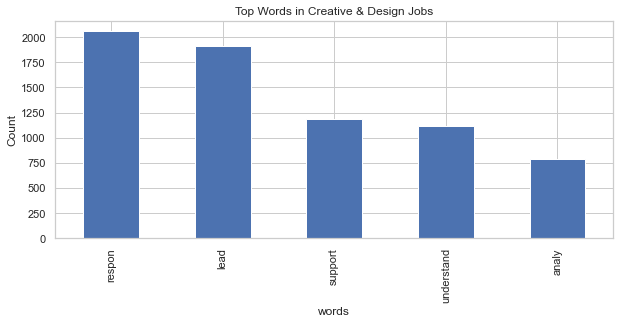

In [30]:
# Group by Category and words, then sum counts
category_words = df_final_group.groupby(['Category', 'words'])['count'].sum().reset_index()

# Top 5 words in each category
top_words_by_category = category_words.groupby('Category').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Bar plot for top words in a few categories
for category in top_words_by_category['Category'].unique()[:5]:  # Adjust this slice as necessary
    subset = top_words_by_category[top_words_by_category['Category'] == category]
    subset.set_index('words')['count'].plot(kind='bar', figsize=(10, 4))
    plt.title(f'Top Words in {category}')
    plt.ylabel('Count')
    plt.show()


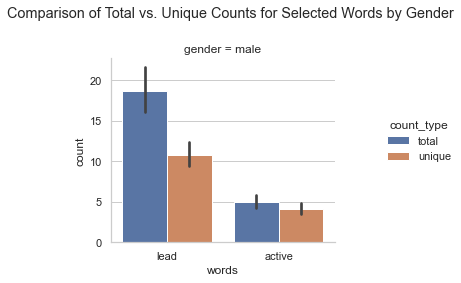

In [32]:
# Plot total vs unique counts for a selection of words
words_selection = df_final_group[df_final_group['words'].isin(['lead', 'active'])]  # Example words, replace as needed
sns.catplot(x='words', y='count', hue='count_type', col='gender', data=words_selection, kind='bar', height=4, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Comparison of Total vs. Unique Counts for Selected Words by Gender')
plt.show()
